In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

from manofunkcijos import *

In [3]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [ ]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""

"""
C.execute(sql)
ans = C.fetchall()
kodas, alga14, prof14 = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)


# 
# axis.ticklabel_format(style='plain')

In [4]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select
lytis, group_concat(bdu_spalio) as gc
from DUS2014N
group by lytis;
"""
C.execute(sql)
ans = C.fetchall()
lytis, atlygis = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |       F        |6,6,6,13.33,10,6|
| 1 |       M        |6,11.33,6,6,6.67|


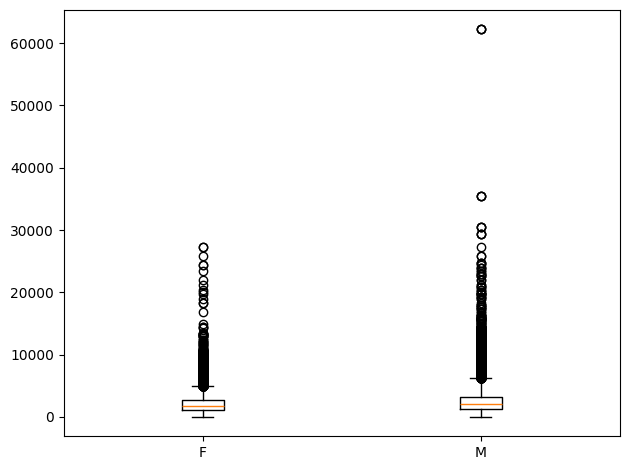

In [5]:
fig, axis = plt.subplots()

axis.boxplot(convert_strarrs_to_floatarrs(atlygis, ','))
axis.set_xticklabels(lytis)


plt.tight_layout()
plt.show()


In [7]:
#  numpy fromsting
atlygis2 = []
for i in atlygis:
    skaiciai = np.fromstring(i, sep=',')
    atlygis2.append(skaiciai)
    
print(atlygis2)

[array([   6.,    6.,    6., ..., 3670., 4212., 4218.]), array([   6.  ,   11.33,    6.  , ..., 3246.  , 3819.67, 2324.  ])]


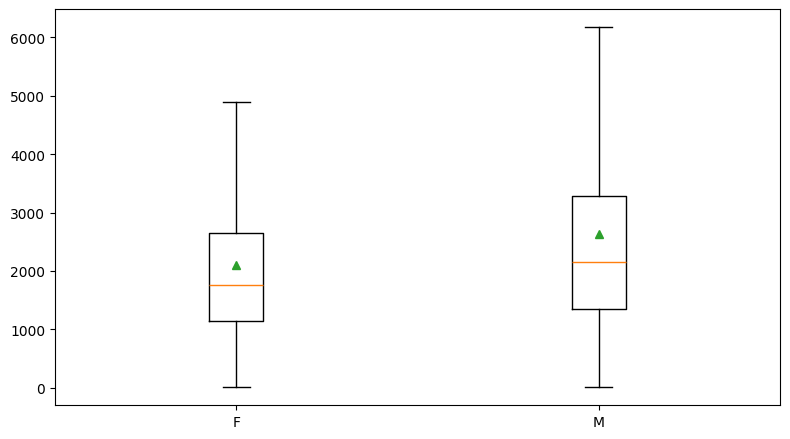

In [10]:
fig, axis = plt.subplots(figsize=(8, 4.5))

axis.boxplot(atlygis2, showmeans=True, showfliers=False)
axis.set_xticklabels(lytis)


plt.tight_layout()
plt.show()

In [ ]:
# parodykite su boxplot atlyginimų pasiskirstymus nuo amžiaus grupės 2018 metams (vyrams ir moterims atskirai).
# Taip pat parodykite su boxplot'ais atlyginimų pasiskirstymus nuo išsilavinimo, 2018 metams 
# (visiems respondentams)

In [11]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
-- vyrai
select amzius, group_concat(bdu_spalio)
from DUS2018N
where lytis = 'M'
group by amzius;
"""
C.execute(sql)
ans = C.fetchall()
amzius, atlvyrgc = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |     14-29      |1400,480,520,540|
| 1 |     30-39      |1072,2644,2936,4|
| 2 |     40-49      |1500,5265,480,43|
| 3 |     50-59      |1487,1500,400,48|
| 4 |      60+       |457,756,400,671,|


In [12]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
-- moterys
select amzius, group_concat(bdu_spalio)
from DUS2018N
where lytis = 'F'
group by amzius;
"""
C.execute(sql)
ans = C.fetchall()
amzius, atlmotgc = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |     14-29      |400,511,915,975,|
| 1 |     30-39      |400,440,1061,178|
| 2 |     40-49      |460,400,400,407,|
| 3 |     50-59      |400,216,505,770,|
| 4 |      60+       |225,663,516,530,|


In [13]:
#  numpy fromsting
atlvyr = []
for i in atlvyrgc:
    skaiciai = np.fromstring(i, sep=',')
    atlvyr.append(skaiciai)


In [14]:
#  numpy fromsting
atlmot = []
for i in atlmotgc:
    skaiciai = np.fromstring(i, sep=',')
    atlmot.append(skaiciai)

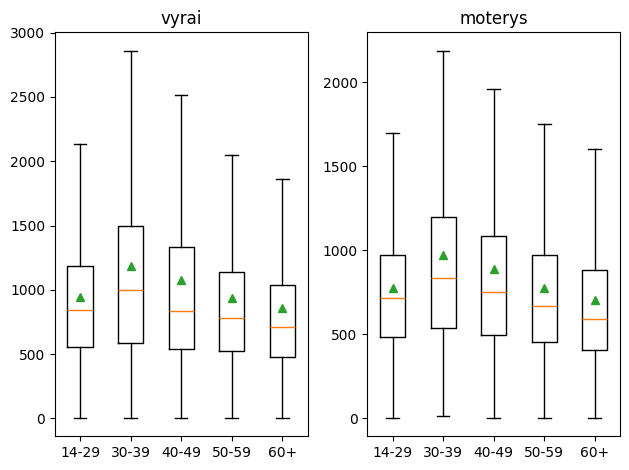

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.boxplot(atlvyr, showmeans=True, showfliers=False)
ax1.set_xticklabels(amzius)
ax1.set_title('vyrai')

ax2.boxplot(atlmot, showmeans=True, showfliers=False)
ax2.set_xticklabels(amzius)
ax2.set_title('moterys')

plt.tight_layout()
plt.show()

In [24]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
-- vyrai
select issilavinimas, group_concat(bdu_spalio)
from DUS2018N
where lytis = 'M'
group by issilavinimas;
"""
C.execute(sql)
ans = C.fetchall()
issilavinimas, atlvyrgc = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |       G1       |555,686,455,848,|
| 1 |       G2       |1487,1500,1500,4|
| 2 |       G3       |489,769,900,1028|
| 3 |       G4       |1072,1400,2644,2|


In [25]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
-- moterys
select issilavinimas, group_concat(bdu_spalio)
from DUS2018N
where lytis = 'F'
group by issilavinimas;
"""
C.execute(sql)
ans = C.fetchall()
issilavinimas, atlmotgc = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |       G1       |436,1050,440,596|
| 1 |       G2       |460,400,400,400,|
| 2 |       G3       |511,915,975,1087|
| 3 |       G4       |1061,5934,663,55|


In [23]:
#  numpy fromsting
atlvyr = []
for i in atlvyrgc:
    skaiciai = np.fromstring(i, sep=',')
    atlvyr.append(skaiciai)
    
#  numpy fromsting
atlmot = []
for i in atlmotgc:
    skaiciai = np.fromstring(i, sep=',')
    atlmot.append(skaiciai)

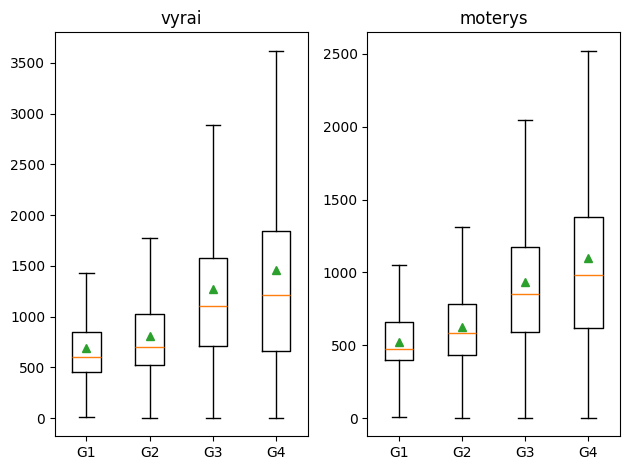

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.boxplot(atlvyr, showmeans=True, showfliers=False)
ax1.set_xticklabels(issilavinimas)
ax1.set_title('vyrai')

ax2.boxplot(atlmot, showmeans=True, showfliers=False)
ax2.set_xticklabels(issilavinimas)
ax2.set_title('moterys')

plt.tight_layout()
plt.show()

In [ ]:
# Pateikite su boxplot'u  skelbimų kainų pasiskirtymą top 5 automobilių gamintojams.

In [27]:
sql="""
select gamintojas, count(*) as kiekis,
group_concat(cast(replace(price, ' ', '') as float)) as kaina
from autopliuslt
group by gamintojas
order by kiekis desc
limit 5; 
"""
C.execute(sql)
ans = C.fetchall()
gamintojas, kiekis, kaina = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |      BMW       |      365       |19500,16190,2890|
| 1 |   Volkswagen   |      310       |16490,6500,7300,|
| 2 |      Audi      |      227       |1200,5500,7100,1|
| 3 | Mercedes-Benz  |      177       |42500,7500,28900|
| 4 |     Toyota     |      154       |11900,4250,4350,|


In [28]:
#  numpy fromsting
kaina2 = []
for i in kaina:
    skaiciai = np.fromstring(i, sep=',')
    kaina2.append(skaiciai)

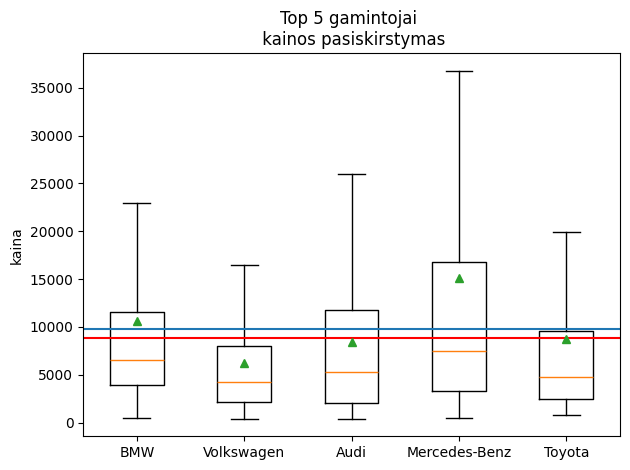

In [36]:
fig, ax1 = plt.subplots()

ax1.boxplot(kaina2, showmeans=True, showfliers=False)
ax1.set_xticklabels(gamintojas)
ax1.set_ylabel('kaina')
ax1.set_title('Top 5 gamintojai \n kainos pasiskirstymas')
ax1.axhline(y=8831, color='red')
ax1.axhline(y=9815, label='top 5')

plt.tight_layout()
plt.show()

In [44]:
# -- pateikite su bar arba barh vidutines automobilių kainas
# -- top 5 gamintojams, dviem variantais:
# -- a) laikote, kad visi skelbimai yra unikalūs
# -- b) eliminuojate pasikartojančius skelbimus (jei skelbimo id kartojasi DB įrašuose
# -- tai skelbimas nėra unikalus, jis dubliuojasi)

sql="""
with T1 as
(select gamintojas, 
cast(replace(price, ' ', '') as float) as kaina,
row_number() over (partition by id) as rn
from autopliuslt)
select gamintojas, count(*) as kiekis, round(avg(kaina))
from T1
where rn < 2
group by gamintojas
order by kiekis desc
limit 5;;
"""
C.execute(sql)
ans = C.fetchall()
gamintojas, kiekis, unikaina = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |      BMW       |      258       |    11547.0     |
| 1 |   Volkswagen   |      222       |     6639.0     |
| 2 |      Audi      |      161       |     9038.0     |
| 3 | Mercedes-Benz  |      135       |    15434.0     |
| 4 |     Toyota     |      114       |     9016.0     |


In [41]:
sql="""
select gamintojas, count(*) as kiekis,
round(avg(cast(replace(price, ' ', '') as float))) as kaina
from autopliuslt

group by gamintojas
order by kiekis desc
limit 5;
"""
C.execute(sql)
ans = C.fetchall()
gamintojas, kiekis, kaina = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |      BMW       |      365       |    10652.0     |
| 1 |   Volkswagen   |      310       |     6191.0     |
| 2 |      Audi      |      227       |     8448.0     |
| 3 | Mercedes-Benz  |      177       |    15080.0     |
| 4 |     Toyota     |      154       |     8713.0     |


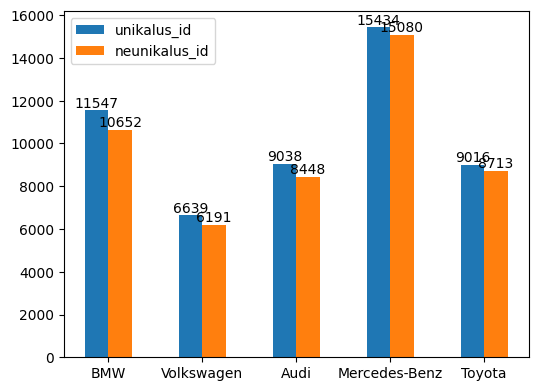

In [47]:
fig, axis = plt.subplots(figsize=[6,4.5])

x = np.arange(0,len(gamintojas))
w = 0.25
B1 = axis.bar(x-w/2, unikaina, label='unikalus_id', width=w)
axis.bar_label(B1)
B2 = axis.bar(x+w/2, kaina, label='neunikalus_id', width=w)
axis.bar_label(B2)

axis.set_xticks(x)
axis.set_xticklabels(gamintojas)


axis.legend(loc='best')
plt.show()

In [ ]:
# atvaizduokite boxplotais kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)


# atvaziduokite boxplotu ridos pasiskirstymą nuo kuro rūšies/tipo

# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo

# pagal jūsų surinktas ir pastebėtas priklausomybes, jei matote:
# M-Benz, 12 metų, benzinas, 210 000 km -
# kokia kaina būtų konkurencinga/logiška/tikėtina? Kodėl?




# https://matplotlib.org/stable/gallery/statistics/boxplot_color.html  spalvos

In [55]:
sql="""
select Rida, group_concat(Kaina) as P
from
(select 
ceil(cast(replace(replace(rida, ' ', ''), 'km', '') as float) / 15000.0) * 15000.0
as Rida,
cast(replace(price, ' ', '') as float) as Kaina
from autopliuslt
where rida != 'Nenurodyta'
)
as T
group by Rida;
"""
C.execute(sql)
ans = C.fetchall()
rida, kainagc = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

#  numpy fromsting
kaina = []
for i in kainagc:
    skaiciai = np.fromstring(i, sep=',')
    kaina.append(skaiciai)

Rodoma 20 eilutės iš 43
| 0 |    15000.0     |5900,19900,29900|
| 1 |    30000.0     |16800,19900,1000|
| 2 |    45000.0     |32000,14950,2080|
| 3 |    60000.0     |41321,111000,610|
| 4 |    75000.0     |28900,21900,1190|
| 5 |    90000.0     |14000,26500,3500|
| 6 |    105000.0    |8000,11900,22250|
| 7 |    120000.0    |28500,12990,2169|
| 8 |    135000.0    |13490,38000,1479|
| 9 |    150000.0    |2000,10790,13000|
|10 |    165000.0    |16190,16490,1550|
|11 |    180000.0    |28900,29500,2499|
|12 |    195000.0    |14650,1200,42500|
|13 |    210000.0    |2700,5590,7500,8|
|14 |    225000.0    |4200,7300,37000,|
|15 |    240000.0    |11990,2950,8900,|
|16 |    255000.0    |19500,14995,1600|
|17 |    270000.0    |19700,30999,2900|
|18 |    285000.0    |2000,5500,32000,|
|19 |    300000.0    |3390,6500,1270,4|


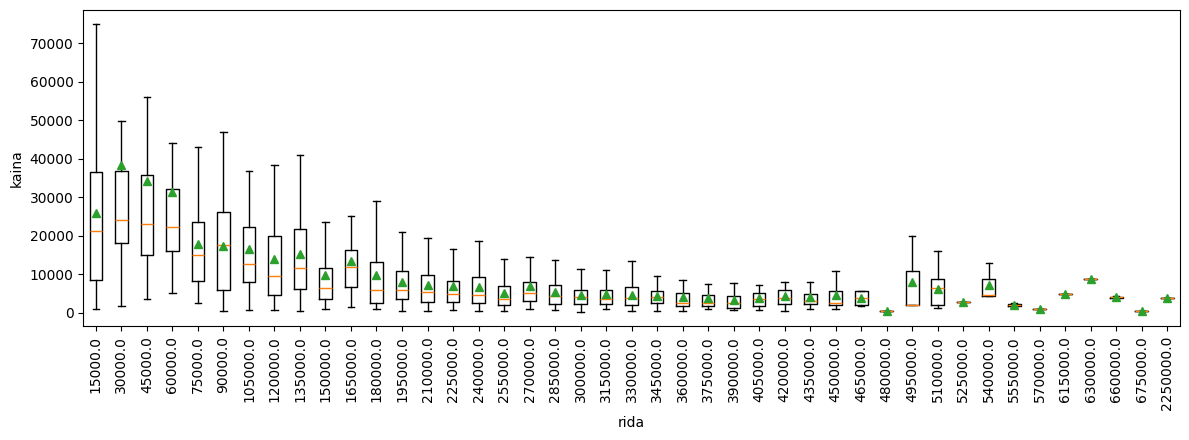

In [57]:
fig, axis = plt.subplots(figsize=(12, 4.5))

axis.boxplot(kaina, showmeans=True, showfliers=False)
axis.set_xticklabels(rida)
axis.tick_params(axis='x', rotation=90)
axis.set_ylabel('kaina')
axis.set_xlabel('rida')

plt.tight_layout()
plt.show()

In [58]:
sql="""
select kuro_tipas,
group_concat(cast(replace(replace(rida, ' ', ''), 'km', '') as float))  as Rida
from autopliuslt
group by kuro_tipas;
"""
C.execute(sql)
ans = C.fetchall()
kuras, ridagc = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

#  numpy fromsting
rida = []
for i in ridagc:
    skaiciai = np.fromstring(i, sep=',')
    rida.append(skaiciai)

| 0 |    Benzinas    |253000,195405,18|
| 1 |Benzinas / dujos|258000,155000,20|
| 2 |Benzinas / elekt|292000,209000,45|
| 3 |Benzinas / elekt|250000,240000,69|
| 4 |   Dyzelinas    |129800,127896,10|
| 5 |Dyzelinas / elek|218000,263000,78|
| 6 |    Elektra     |6000,47000,19800|


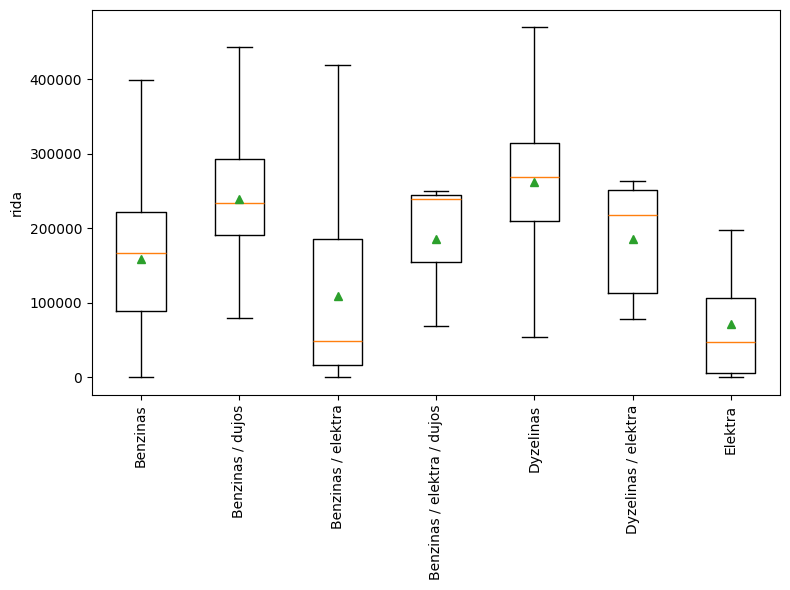

In [63]:
fig, axis = plt.subplots(figsize=(8, 6))

axis.boxplot(rida, showmeans=True, showfliers=False)
axis.set_xticklabels(kuras)
axis.tick_params(axis='x', rotation=90)
axis.set_ylabel('rida')


plt.tight_layout()
plt.show()

In [67]:
sql="""
select gamintojas,
group_concat(cast(replace(replace(rida, ' ', ''), 'km', '') as float))  as Rida
from autopliuslt
group by gamintojas;
"""
C.execute(sql)
ans = C.fetchall()
gamintojas, ridagc = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

#  numpy fromsting
rida = []
for i in ridagc:
    skaiciai = np.fromstring(i, sep=',')
    rida.append(skaiciai)

Rodoma 5 eilutės iš 51
| 0 |   Alfa Romeo   |308615,308615,30|
| 1 |  Aston Martin  |     45000      |
| 2 |      Audi      |194000,280058,39|
| 3 |      BMW       |253000,158486,74|
| 4 |    Cadillac    |245000,245000,27|


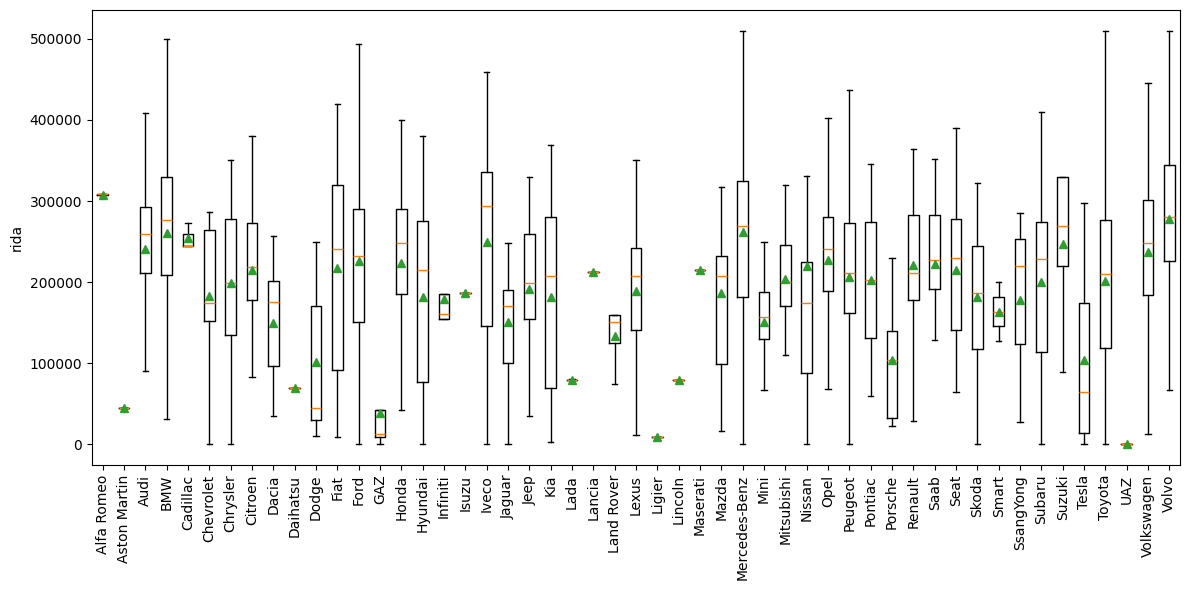

In [68]:
fig, axis = plt.subplots(figsize=(12, 6))

axis.boxplot(rida, showmeans=True, showfliers=False)
axis.set_xticklabels(gamintojas)
axis.tick_params(axis='x', rotation=90)
axis.set_ylabel('rida')


plt.tight_layout()
plt.show()

In [ ]:
# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių
# kainą.

# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių.
# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių kainų pasiskirstymą.